In [2]:
# Initial imports

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
# Load .env enviroment variables

load_dotenv()

True

In [4]:
#Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "format=json"
eth_url = eth_url + "format=json"

In [7]:
# Fetch current BTC& ETH price

btc_price = requests.get(btc_url)
eth_price = requests.get(eth_url)

btc_response = btc_price.content
eth_response = eth_price.content

btc_data = btc_price.json()
eth_data = eth_price.json()

btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41161.20
The current value of your 5.3 ETH is $11359.97


In [8]:
#SPY & AGG 
#Current amount of shares

my_agg = 200
my_spy = 50

In [9]:
#Set the Alpaca API & Secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
#Create the Alpaca API Object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [11]:
#Format current date as ISO format

today = pd.Timestamp("2021-07-09", tz="America/New_York").isoformat()

#Set the tickers
tickers = ["AGG", "SPY"]

timeframe = "1D"

#Get current closing prices for SPY and AGG

df_portfolio = api.get_barset(tickers, timeframe, start=today, end=today).df

#Preview dataframe

df_portfolio                    

AGG                                      SPY  \
                              open    high     low   close   volume    open   
time                                                                          
2021-07-09 00:00:00-04:00  115.735  115.76  115.69  115.69  4602694  432.53   

                                                              
                             high      low   close    volume  
time                                                          
2021-07-09 00:00:00-04:00  435.84  430.714  435.48  59254094

In [12]:
#Pick AGG and SPY close prices

agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

#Print AGG and SPY close prices

print(f"current AGG closing price: ${agg_close_price}")
print(f"current SPY closing price: ${spy_close_price}")

current AGG closing price: $115.69
current SPY closing price: $435.48


In [13]:
#Compute the current value of shares

my_agg_value = my_spy * agg_close_price
my_spy_value = my_agg * spy_close_price

print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}.")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}.")

The current value of your 200 AGG shares is $5784.50.
The current value of your 50 SPY shares is $87096.00.


In [16]:
#Set Monthly Household Income

monthly_income= 12000

#Create Savings Dataframe

total_portfolio = {'Amount': [my_btc_value + my_eth_value, my_spy_value+my_agg_value]}
df_savings = pd.DataFrame(total_portfolio, index=['Crypto', 'Shares'])

#Display Savings Dataframe 

display(df_savings)

,Amount
Crypto,52521.167
Shares,92880.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

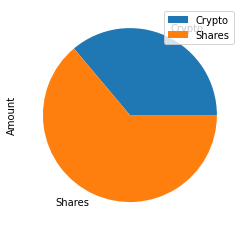

In [17]:
#Plot savings Pie chart

df_savings.plot(kind='pie', subplots=True)

In [20]:
#Set ideal emergency fund

emergency_fund = monthly_income * 3

#Calculate total amount of savings

total_savings = df_savings.sum().item()

#Validate savings health

if total_savings > emergency_fund:
    print("Congratulations on having more than 3X your montly income in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3X your montly income in your emergency fund")
else:
    print(f'you are ${emergency_fund-total_savings} away from reaching your goal of 3X your monthly income in your emergency fund')

Congratulations on having more than 3X your montly income in your emergency fund


In [22]:
#Set start and end dates of five years back from today

start_date = pd.Timestamp('2016-07-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-09', tz='America/New_York').isoformat()
timeframe="1D"

In [24]:
#Get 5 years worth of historical data for SPY & AGG

df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

#Display sample data

df_stock_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-17 00:00:00-05:00  116.2200  116.2900  116.1450  116.28  6038386   
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4412312   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-02-17 00:00:00-05:00  390.42  392.660  389.33  392.43  44671866  
2021-02-18 00:00:00-05:00  389.59  391.515  387.74  390.75  52370380  
2021-02-19 00:00:00-05:00  392.07  392.380  389.55  390.02  66437346  
2021-02-22 00:00:00-05:00  387.06  389.620  386.74  387.11  56604869  
2021-02-23 00:00:00-05:00  384.66  388.945  380.20  387.50  98333278

In [26]:
#Configure a MC simulation to forecast 30 years cumulative returns, the weights for portfolio 40%AGG and 60%SPY

MC = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60],num_simulation = 500, num_trading_days = 252*30)

In [27]:
MC.portfolio_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-17 00:00:00-05:00  116.2200  116.2900  116.1450  116.28  6038386   
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4412312   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2021-02-17 00:00:00-05:00          NaN  390.42  392.660  389.33  392.43   
2021-02-18 00:00:00-05:00    -0.000688  389.59  391.515  387.74  390.75   
2021-02-19 00:00:00-05:00    -0.003184  392.07  392.380  389.55  390.02   
2021-02-22 00:00:00-05:00    -0.002935  387.06  389.620  386.74  387.11   
2021-02-23 00:00:00-05:00     0.000260  384.66  388.945  380.20  387.50   

                                                  
                             volume daily_return  
time                                              
2021-02-17 00:00:00-05:00  44671866          NaN  
2021-02-18 00:00:00-05:00  52370380    -0.004281  
2021-02-19 00:00:00-05:00  66437346    -0.001868  
2021-02-22 00:00:00-05:00  56604869    -0.007461  
2021-02-23 00:00:00-05:00  98333278     0.001007

In [28]:
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993704,1.004352,1.004698,0.998094,1.004550,0.998281,1.003518,0.995198,1.004166,1.004508,...,0.997840,1.004363,0.999722,1.003019,1.011295,0.994150,0.996412,1.002478,1.001649,1.003940
2,0.988609,1.003308,1.000313,1.009012,1.002721,1.000329,0.998479,0.993134,1.001603,1.000517,...,1.000478,0.998286,1.005654,1.008886,1.015443,0.987257,0.991251,1.001430,1.008001,0.998266
3,0.993627,1.013824,1.009415,1.013133,1.002949,0.997362,0.997526,0.985222,1.002437,1.006906,...,0.999422,1.001328,1.011770,1.000357,1.018361,0.987423,0.986547,1.008656,1.004546,1.000144
4,0.997342,1.010251,1.003126,1.009799,1.003564,0.993344,0.999802,0.986778,1.003253,1.004678,...,1.006375,1.006190,1.009995,1.001971,1.032886,0.990719,0.974599,1.006798,0.997518,1.014465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,142.278564,77.864256,91.423801,65.021613,56.452131,146.868588,137.959112,117.260377,95.822619,72.758351,...,127.168143,219.472060,81.228478,70.304856,178.278702,58.278785,97.923178,220.446438,72.057648,50.282115
7557,142.952634,77.654718,91.434011,65.472482,56.346724,146.784809,138.733392,117.040687,96.906891,72.812847,...,126.809948,218.259423,81.706809,70.616246,179.915916,58.373544,98.431219,221.026473,72.243542,49.815405
7558,142.969957,78.011208,91.711461,65.418403,56.714239,147.651073,138.784691,117.603240,96.674954,72.573709,...,127.581145,215.904072,81.227414,70.598550,180.293578,58.186898,98.400406,221.429215,72.347819,50.037007
7559,142.117254,78.200382,91.233807,65.630690,56.663023,148.187187,138.715967,118.437799,97.283874,72.351629,...,128.172156,217.939399,81.469614,71.356463,180.959093,58.080133,98.717076,221.324734,73.035493,50.273365


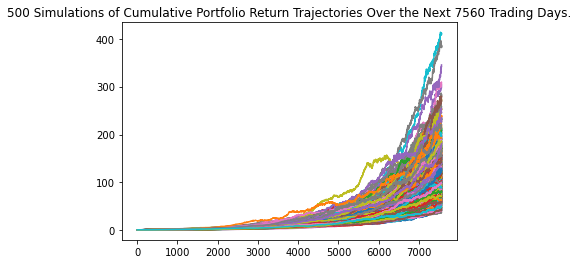

In [29]:
#Plot simulation outcomes

line_plot = MC.plot_simulation()

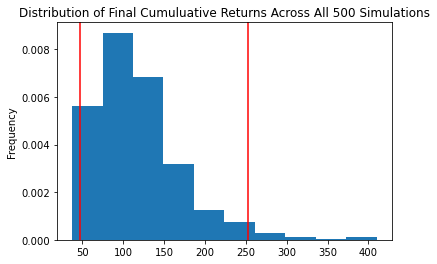

In [30]:
#Plot probability distribution and confidence intervals

dist_plot = MC.plot_distribution()

In [32]:
#Fetch summary statistis from the MC su=imulations results

even_tbl = MC.summarize_cumulative_return()

#Print summary statistics

print(even_tbl)

count           500.000000
mean            117.348978
std              53.377153
min              37.504060
25%              79.081050
50%             107.349066
75%             141.114283
max             409.936304
95% CI Lower     47.019639
95% CI Upper    252.714215
Name: 7560, dtype: float64


In [34]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $940392.78 and $5054284.3


In [35]:
# Set initial investment

initial_investment = 20000*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1410589.17 and $7581426.45
